<a href="https://colab.research.google.com/github/jvallalta/aih/blob/main/time_domain_plotting_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time-Domain Plotting
Let's learn about how we can plot signals in Python and visually explore our data. We're going to be using the matplotlib library**,** which is a close analog to MATLAB's native plotting library.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

This line is called an IPython magic. It tells matplotlib which GUI bakend to use to make the plots. If you're on a mac you can use the osx backend, otherwise you can use the QT library to make your plots or you can use tkinter. I'm on a mac so I'll use osx.

In [2]:
%matplotlib inline

First, let's make our test signal, which is just a sum of various sinusoids at different frequencies, multiplied by an exponential decay function.

In [3]:
fs = 125
ts = np.arange(0, 60, 1/fs)
freqs = [0.2, 0.4, 0.8, 2, 10]
amps = [10, 2, 2, 2, 1]
sig = np.sum([a * np.sin(ts * 2 * np.pi * f) for a, f in zip(amps, freqs)], axis=0) * np.exp(-.05 * ts)

Let's see what it looks like by plotting it. First, we make a new figure and set its size and then we plot the signal. The first argument is the x-axis, which here is the timestamp, and the second argument is the signal.


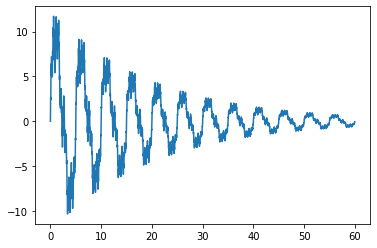

In [4]:
plt.clf()
plt.plot(ts, sig)

If you're working in an Udacity workspace or on a virtual machine sometimes a new window will not work for you. In that case, you can use the inline backend to render the plots in the notebook. This is also useful for collaboration or if you want to keep your plots with all your other outputs.

In [5]:
%matplotlib inline

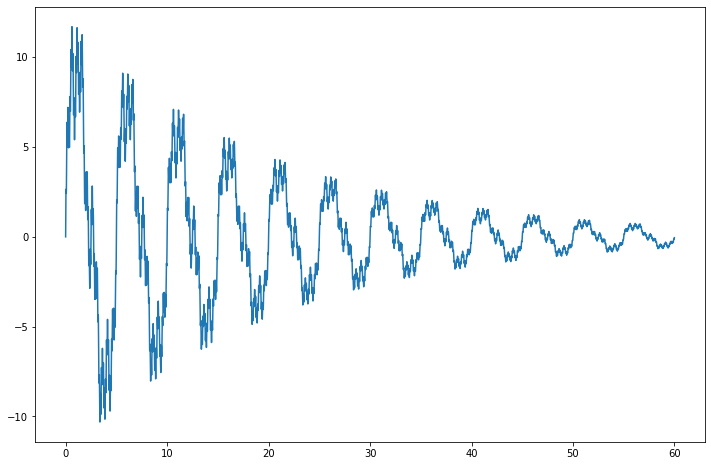

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(ts, sig)

That plot isn't very interactive. We can make it interactive by using `mpld3`.

In [7]:
import mpld3
mpld3.enable_notebook()

ModuleNotFoundError: ignored

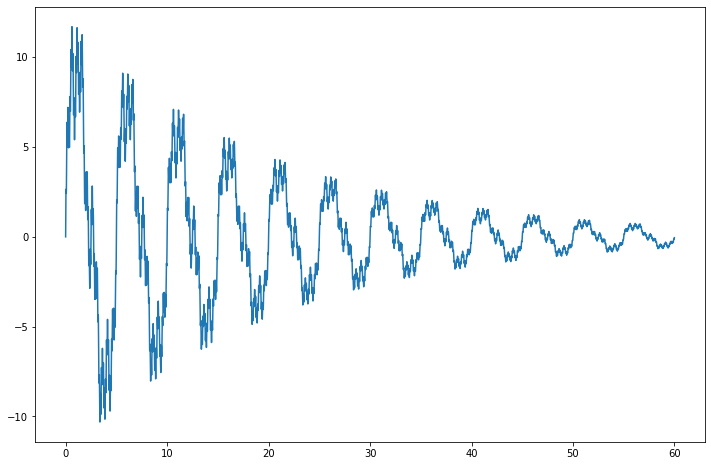

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(ts, sig)

## Zero-Crossing
Let's do something a little more interesting. Let's find try to find the zero-crossings of the signal. A zero-crossing is the point in time that the signal changes sign.

In [9]:
zero_crossings = np.where(np.diff(np.sign(sig)))[0]

In [10]:
zero_crossings

array([   0,  281,  312,  343,  625,  906,  937,  968, 1250, 1531, 1562,
       1593, 1875, 2156, 2187, 2218, 2500, 2781, 2812, 2843, 3124, 3406,
       3437, 3468, 3750, 4031, 4062, 4093, 4375, 4656, 4687, 4718, 5000,
       5281, 5312, 5343, 5625, 5906, 5937, 5968, 6249, 6531, 6562, 6593,
       6874, 7156, 7187, 7218])

We can verify that these are correct by plotting their locations on top of the signal

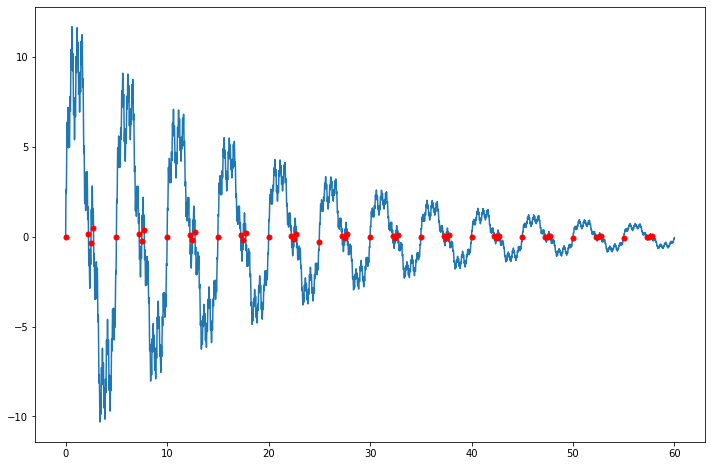

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(ts, sig)
plt.plot(ts[zero_crossings], sig[zero_crossings], 'r.', ms=10)

The zero-crossings we found aren't exactly at 0. This is because our original signal isn't continuous; it's digitally sampled! That means we didn't sample the signal exactly when it crossed zero and our zero-crossings are the closest point we have to a "real" zero-crossing.

We can visualize this by only plotting the signal points that we have and not connecting them with lines in between.

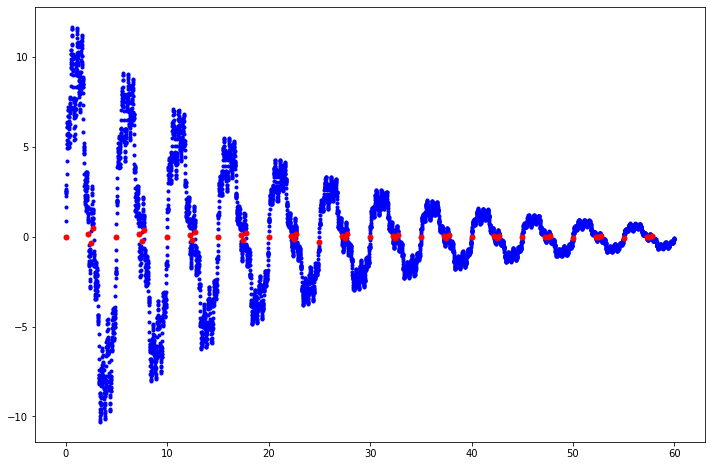

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(ts, sig, 'b.')
plt.plot(ts[zero_crossings], sig[zero_crossings], 'r.', ms=10)

## Comparing Two Plots
Now let's make a new but very similar looking signal.

In [13]:
fs = 125
ts = np.arange(0, 60, 1/fs)
freqs = [0.2, 0.4, 0.8, 2, 10]
amps = [.90, .2, .2, .2, .1]
sig2 = np.sum([a * np.sin(ts * 2 * np.pi * f) for a, f in zip(amps, freqs)], axis=0) * np.exp(-.05 * ts) 

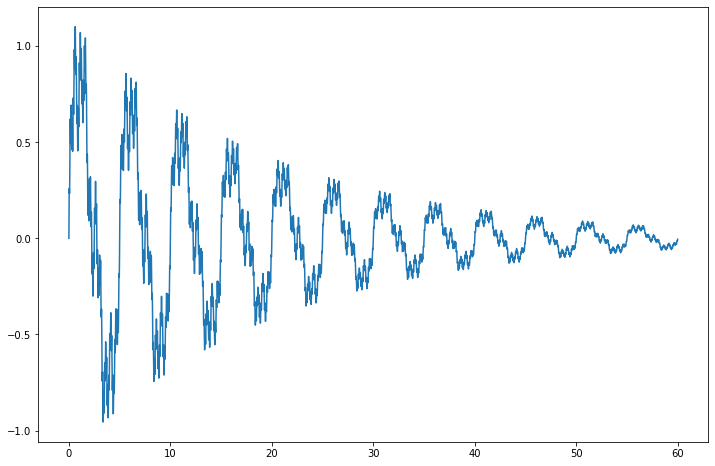

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(ts, sig2)

This signal looks very similar to our original one, but the y-axis is scaled differently. Is this signal just a scaled version of the old one? We can answer this by plotting the two signals on the same x-axis, but using different y-axes.

In [15]:
%matplotlib inline

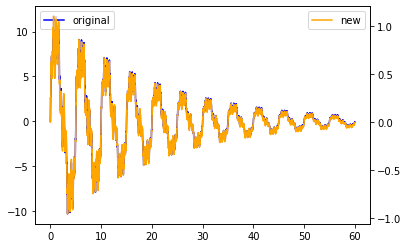

In [16]:
plt.clf()
plt.plot(ts, sig, 'b', label='original')
plt.legend(loc='upper left')
plt.twinx()
plt.plot(ts, sig2, 'orange', label='new')
plt.legend(loc='upper right')

We can also plot two signals on separate axes on the same figure.

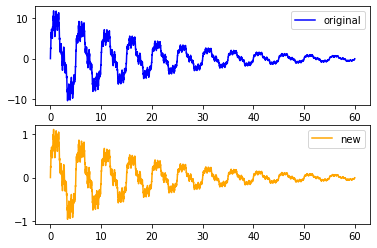

In [17]:
plt.clf()
plt.subplot(2, 1, 1)
plt.plot(ts, sig, 'b', label='original')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(ts, sig2, 'orange', label='new')
plt.legend()

Depending on your signals, some methods will be better for exploration than others.

These are some basic tools to get you started exploring data. matplotlib has a whole lot more functionality to help you explore your data and you can learn more by reading the [matplotlib docs](https://matplotlib.org/).